# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
from api_keys import weather_api_key
#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

http://api.openweathermap.org/data/2.5/weather?appid=bd923925b406be26047f7291a2d6a219&units=imperial&q=
{
    "coord": {
        "lon": -159.32,
        "lat": 22.08
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 82.6,
        "feels_like": 82.49,
        "temp_min": 81,
        "temp_max": 84,
        "pressure": 1013,
        "humidity": 69
    },
    "visibility": 10000,
    "wind": {
        "speed": 14.99,
        "deg": 200,
        "gust": 20.8
    },
    "clouds": {
        "all": 90
    },
    "dt": 1603060994,
    "sys": {
        "type": 1,
        "id": 7873,
        "country": "US",
        "sunrise": 1603038887,
        "sunset": 1603080567
    },
    "timezone": -36000,
    "id": 5848280,
    "name": "Kapaa",
    "cod": 200
}


In [7]:
print(requests.get(query_url + city))

<Response [200]>


In [8]:
# Set Up Lists to Hold Reponse Info
city_name = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Carnarvon
Processing Record 2 | Nouadhibou
Processing Record 3 | Severo-Kuril'sk
Processing Record 4 | Tasiilaq
Processing Record 5 | East London
City not found. Skipping...
Processing Record 6 | Meulaboh
Processing Record 7 | Bluff
Processing Record 8 | Tuatapere
Processing Record 9 | Shimoda
Processing Record 10 | Carutapera
Processing Record 11 | Jamestown
City not found. Skipping...
Processing Record 12 | Kapaa
Processing Record 13 | Cape Town
Processing Record 14 | Bilibino
Processing Record 15 | La Palma
Processing Record 16 | Punta Arenas
Processing Record 17 | Mar del Plata
Processing Record 18 | Yellowknife
Processing Record 19 | Barrow
Processing Record 20 | Atuona
Processing Record 21 | Nabire
Processing Record 22 | Mataura
Processing Record 23 | Hilo
Processing Record 24 | Hermanus
Processing Record 25 | Albany
Processing Record 26 | Airai
City not found. Skipping...
P

Processing Record 233 | Namchi
Processing Record 234 | Vostok
Processing Record 235 | Andenes
Processing Record 236 | Hervey Bay
Processing Record 237 | Seoul
Processing Record 238 | Pacifica
Processing Record 239 | Mossamedes
Processing Record 240 | Pangai
Processing Record 241 | Matonga
Processing Record 242 | Byndoor
Processing Record 243 | Kuril'sk
Processing Record 244 | San Quintín
Processing Record 245 | Çay
Processing Record 246 | Koshurnikovo
Processing Record 247 | Bathsheba
Processing Record 248 | Upernavik
Processing Record 249 | Banjar
Processing Record 250 | Paso de Carrasco
Processing Record 251 | Sittwe
Processing Record 252 | Novomykolayivka
Processing Record 253 | Tiksi
Processing Record 254 | Zhanakorgan
Processing Record 255 | Strelka
Processing Record 256 | Oistins
Processing Record 257 | Ponta Delgada
Processing Record 258 | Chokurdakh
Processing Record 259 | Bengkulu
Processing Record 260 | Mercedes
Processing Record 261 | Benguela
Processing Record 262 | Uvat
Pr

Processing Record 467 | Havre-St-Pierre
Processing Record 468 | Zheleznodorozhnyy
Processing Record 469 | Hays
Processing Record 470 | Kavaratti
Processing Record 471 | Ranot
Processing Record 472 | Barra de Tecoanapa
Processing Record 473 | Mrakovo
Processing Record 474 | Boa Vista
Processing Record 475 | Walvis Bay
Processing Record 476 | Ngunguru
Processing Record 477 | Pokhara
Processing Record 478 | Juneau
Processing Record 479 | Imbituba
Processing Record 480 | Mwinilunga
Processing Record 481 | Daoukro
Processing Record 482 | Atasū
Processing Record 483 | Mt. Pleasant
City not found. Skipping...
Processing Record 484 | Lagoa
Processing Record 485 | Malindi
City not found. Skipping...
Processing Record 486 | Morondava
Processing Record 487 | Liverpool
Processing Record 488 | Pemberton
City not found. Skipping...
Processing Record 489 | Matamoros
Processing Record 490 | Don Sak
Processing Record 491 | São José da Coroa Grande
Processing Record 492 | Manāwar
Processing Record 493 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_dict = {
    "city": city_name,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    }

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

city          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [20]:
# Display the dataframe
weather_data.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.87,113.63,68.00,94,90,6.93,AU,1603061442
1,Nouadhibou,20.93,-17.03,80.60,47,36,17.22,MR,1603061442
2,Severo-Kuril'sk,50.68,156.12,49.59,78,10,11.77,RU,1603061442
3,Tasiilaq,65.61,-37.64,33.80,80,74,9.17,GL,1603061442
4,East London,-33.02,27.91,62.42,74,32,4.54,ZA,1603061442


In [21]:
# Export & save data into a .csv.
weather_data.to_csv("./Data/weather_data.csv")

In [22]:
# Display key statistics of the dataframe
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,18.896148,17.502984,61.107161,73.719711,54.358047,7.610633,1.603061e+09
std,32.819680,90.601698,19.645163,20.338599,38.228080,5.359593,7.212210e+01
min,-54.800000,-175.200000,7.180000,1.000000,0.000000,0.130000,1.603061e+09
25%,-8.480000,-60.620000,45.450000,65.000000,15.000000,3.670000,1.603061e+09
50%,20.700000,21.700000,65.530000,78.000000,66.000000,6.710000,1.603061e+09
75%,47.670000,97.520000,77.610000,88.000000,90.000000,9.640000,1.603062e+09
max,78.220000,178.420000,93.200000,100.000000,100.000000,37.850000,1.603062e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
# Based on the max row, there are no cities where the humidity is > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

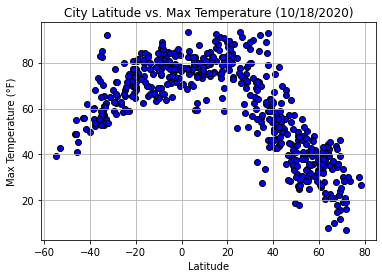

In [38]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature (10/18/2020)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

## Latitude vs. Humidity Plot

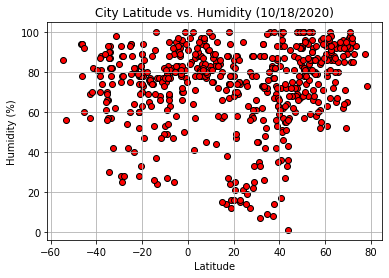

In [35]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity (10/18/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

## Latitude vs. Cloudiness Plot

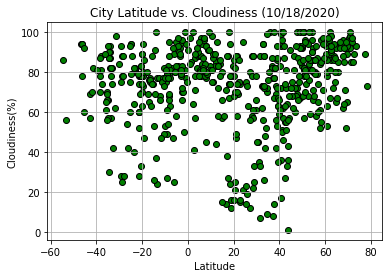

In [36]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness (10/18/2020)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

## Latitude vs. Wind Speed Plot

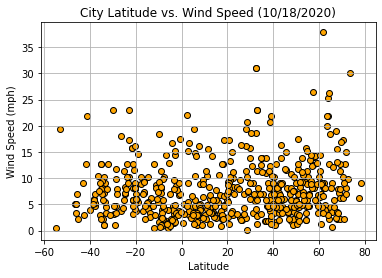

In [39]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolors="orange", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (10/18/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("./Data/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

## Linear Regression

Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [114]:
# Define plotting function:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [115]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = weather_data.loc[weather_data["Lat"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Lat"] < 0,:]

In [116]:
# Display the Northern Hemisphere Dataframe
northlat_df.head(15)

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Nouadhibou,20.93,-17.03,80.60,47,36,17.22,MR,1603061442
2,Severo-Kuril'sk,50.68,156.12,49.59,78,10,11.77,RU,1603061442
3,Tasiilaq,65.61,-37.64,33.80,80,74,9.17,GL,1603061442
5,Meulaboh,4.14,96.13,75.88,82,100,4.45,ID,1603061443
8,Shimoda,34.67,138.95,55.99,70,83,12.46,JP,1603061443
10,Jamestown,42.10,-79.24,52.00,87,90,8.05,US,1603061164
11,Kapaa,22.08,-159.32,84.00,69,90,14.99,US,1603061257
13,Bilibino,68.05,166.44,17.96,95,92,2.15,RU,1603061444
14,La Palma,33.85,-118.05,84.99,42,1,6.93,US,1603061152
17,Yellowknife,62.46,-114.35,28.00,86,90,8.05,CA,1603061167


In [117]:
# Display the Southern Hemisphere Dataframe
southlat_df.head(15)

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.87,113.63,68.00,94,90,6.93,AU,1603061442
4,East London,-33.02,27.91,62.42,74,32,4.54,ZA,1603061442
6,Bluff,-46.60,168.33,48.99,94,100,5.01,NZ,1603061443
7,Tuatapere,-46.13,167.68,48.99,94,100,5.01,NZ,1603061443
9,Carutapera,-1.20,-46.02,78.42,81,100,6.82,BR,1603061443
12,Cape Town,-33.93,18.42,61.00,82,81,8.05,ZA,1603061339
15,Punta Arenas,-53.15,-70.92,42.80,56,40,19.46,CL,1603061444
16,Mar del Plata,-38.00,-57.56,68.00,88,75,4.70,AR,1603061337
19,Atuona,-9.80,-139.03,78.12,75,3,18.41,PF,1603061445
20,Nabire,-3.37,135.48,76.19,88,100,3.22,ID,1603061445


The r-squared is: -0.8606807094017108


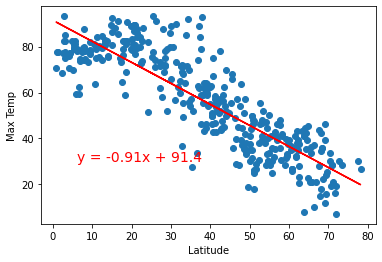

<Figure size 432x288 with 0 Axes>

In [118]:
# Build the Plot
x_values = northlat_df["Lat"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

# Save Figure
plt.savefig("./Data/North_Lat_Temp.png")

# Show Plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7208089435709892


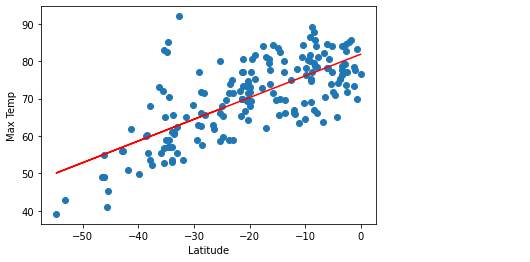

<Figure size 432x288 with 0 Axes>

In [120]:
# Build the Plot
x_values = southlat_df["Lat"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

# Save Figure
plt.savefig("./Data/South_Lat_Temp")

# Show Plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18594683291040284


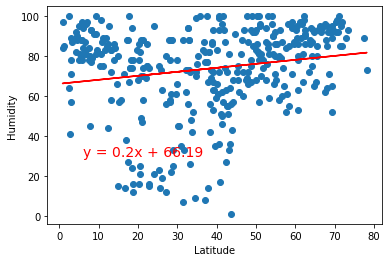

<Figure size 432x288 with 0 Axes>

In [108]:
# Build the Plot
x_values = northlat_df["Lat"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

# Save Figure
plt.savefig("./Data/North_Lat_Humidity.png")

# Show Plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.033569715251620655


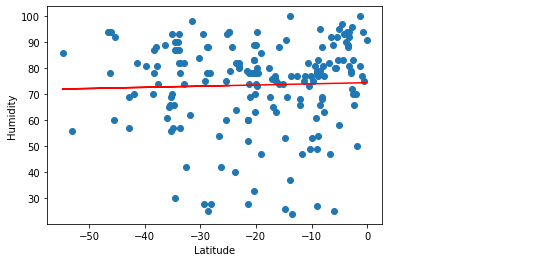

<Figure size 432x288 with 0 Axes>

In [109]:
# Build the Plot
x_values = southlat_df["Lat"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

# Save Figure
plt.savefig("./Data/South_Lat_Humidity.png")

# Show Plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09877496427072952


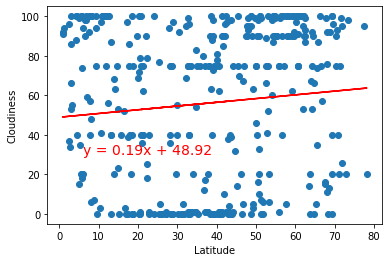

<Figure size 432x288 with 0 Axes>

In [110]:
# Build the Plot
x_values = northlat_df["Lat"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

# Save Figure
plt.savefig("./Data/North_Lat_Cloudiness.png")

# Show Plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14701070792427942


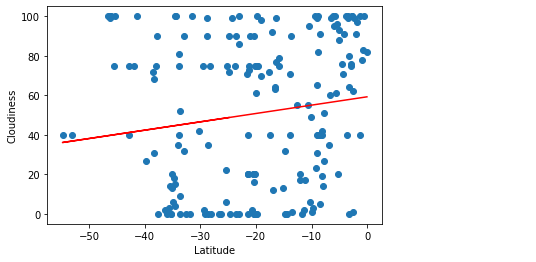

<Figure size 432x288 with 0 Axes>

In [111]:
# Build the Plot
x_values = southlat_df["Lat"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

# Save Figure
plt.savefig("./Data/South_Lat_Cloudiness.png")

# Show Plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1730732788799096


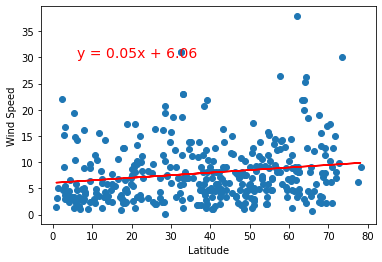

<Figure size 432x288 with 0 Axes>

In [112]:
# Build the Plot
x_values = northlat_df["Lat"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

# Save Figure
plt.savefig("./Data/North_Lat_Wind_Speed.png")

# Show Plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.12215830101714614


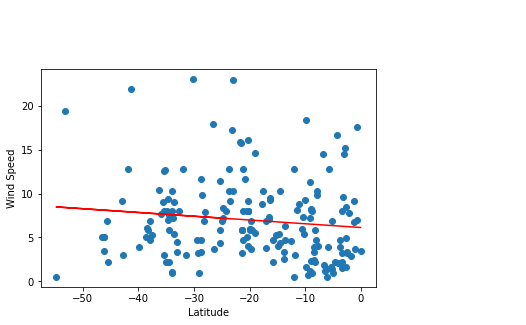

<Figure size 432x288 with 0 Axes>

In [113]:
# Build the Plot
x_values = southlat_df["Lat"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

# Save Figure
plt.savefig("./Data/South_Lat_Wind_Speed.png")

# Show Plot
plt.show()